# Studying the unicity of the ISSDA time series

First make sure to activate the bokeh graphs and pandarallel

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pandarallel import pandarallel
from bokeh.io import output_notebook
import tsunicity

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
output_notebook()

pandarallel.initialize()

Loading BokehJS ...

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


# Loading all the dataset

In [5]:
%%time
df = pd.read_csv("./data/issda_daily.csv")
df

CPU times: user 465 ms, sys: 17.2 ms, total: 482 ms
Wall time: 483 ms


d       1       2       3       4       5       6       7  \
0    2009-07-15  11.203   6.744   6.355  24.183  50.057  17.765  12.056   
1    2009-07-16   8.403   6.949   8.972  26.659  48.813  19.801  17.169   
2    2009-07-17   7.225   7.255   8.794  32.017  32.555  15.216  16.260   
3    2009-07-18  11.338   7.190   8.306  33.032  46.727  23.418  14.813   
4    2009-07-19  11.306   6.805  10.119  31.238  35.215  29.392  12.325   
..          ...     ...     ...     ...     ...     ...     ...     ...   
531  2010-12-28  17.381  52.644   8.472  35.696  65.228  36.374  49.759   
532  2010-12-29   9.543  52.988  10.303  38.353  53.400  34.691  50.875   
533  2010-12-30   8.796  52.742   8.092  33.869  60.470  38.078  27.696   
534  2010-12-31  10.027  52.794  14.106  40.519  56.722  49.690  38.055   
535  2011-01-01  27.907  52.841  10.103  32.449  49.113  45.024  49.700   

          8       9  ...    4612    4613    4614    4615    4616    4617  \
0    51.865  16.889  ...   9.214  14.319  18.357  15.643  36.500  15.346   
1    42.740  18.383  ...  20.573  17.819  25.509  14.667  29.443  26.156   
2    56.390   6.771  ...  15.118  17.562  21.360  18.037  28.786  23.945   
3    43.604   5.977  ...  30.427  15.063  17.576  11.512  31.394  23.118   
4    41.581   7.850  ...  20.712  20.230  25.962  30.767  22.112  15.582   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
531  47.021   3.017  ...  20.584  29.627  16.068  35.692  43.612  32.265   
532  38.606   2.994  ...  27.664  28.673  12.638  18.287  32.728  37.609   
533  46.460   3.013  ...  46.210  41.487  22.231  17.924  21.750  40.996   
534  48.771   9.138  ...  21.122  50.122  18.288  15.074  36.894  40.091   
535  46.948  16.479  ...  11.571  50.189  18.977  23.565  29.970  44.907   

       4618    4619    4620    4621  
0     0.732  14.491  36.813   5.112  
1     0.685  12.597  40.492  18.233  
2     0.707  15.816  41.487   6.925  
3     0.655  13.162  43.986   5.370  
4     0.682  13.301  41.018   6.751  
..      ...     ...     ...     ...  
531   0.656  21.805  42.976  13.105  
532  16.428  21.710  50.498   8.746  
533  17.020  21.031  39.829  11.598  
534  28.328  19.742  46.900  11.055  
535  18.641  20.626  20.240  10.742  

[536 rows x 4622 columns]

In [8]:
ndf = df[df.columns[1:]] * 1000
ndf["d"] = df["d"]
df = ndf

In [9]:
df_kwh = tsunicity.compute.rounding_raster_bis(df, "d", 2)
df_kwh

1      2      3      4      5      6      7      8      9     10  \
0    11200   6700   6300  24100  50000  17700  12000  51800  16800  34000   
1     8400   6900   8900  26600  48800  19800  17100  42700  18300  32500   
2     7200   7200   8700  32000  32500  15200  16200  56300   6700  31300   
3    11300   7100   8300  33000  46700  23400  14800  43600   5900  36000   
4    11300   6800  10100  31200  35200  29300  12300  41500   7800  37800   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
531  17300  52600   8400  35600  65200  36300  49700  47000   3000  31200   
532   9500  52900  10300  38300  53400  34600  50800  38600   2900  31400   
533   8700  52700   8000  33800  60400  38000  27600  46400   3000  34000   
534  10000  52700  14100  40500  56700  49600  38000  48700   9100  27800   
535  27900  52800  10100  32400  49100  45000  49700  46900  16400  39100   

     ...   4613   4614   4615   4616   4617   4618   4619   4620   4621  \
0    ...  14300  18300  15600  36500  15300    700  14400  36800   5100   
1    ...  17800  25500  14600  29400  26100    600  12500  40400  18200   
2    ...  17500  21300  18000  28700  23900    700  15800  41400   6900   
3    ...  15000  17500  11500  31300  23100    600  13100  43900   5300   
4    ...  20200  25900  30700  22100  15500    600  13300  41000   6700   
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
531  ...  29600  16000  35600  43600  32200    600  21800  42900  13100   
532  ...  28600  12600  18200  32700  37600  16400  21700  50400   8700   
533  ...  41400  22200  17900  21700  40900  17000  21000  39800  11500   
534  ...  50100  18200  15000  36800  40000  28300  19700  46900  11000   
535  ...  50100  18900  23500  29900  44900  18600  20600  20200  10700   

              d  
0    2009-07-15  
1    2009-07-16  
2    2009-07-17  
3    2009-07-18  
4    2009-07-19  
..          ...  
531  2010-12-28  
532  2010-12-29  
533  2010-12-30  
534  2010-12-31  
535  2011-01-01  

[536 rows x 4622 columns]

# Computing anonymity set (wh)

In [10]:
%%time
anonset_all_1 = tsunicity.TsAnonsets.from_raster_bis(df, 'd', k=1)
anonset_all_1.df_uni

unicity_all_1 = anonset_all_1.uniques_by_ts()
unicity_all_1.df

CPU times: user 6.81 s, sys: 126 ms, total: 6.94 s
Wall time: 6.95 s


timestamp  nuniques  total  proportion
0   2009-07-15      4495   4621    0.972733
1   2009-07-16      4485   4621    0.970569
2   2009-07-17      4444   4621    0.961697
3   2009-07-18      4474   4621    0.968189
4   2009-07-19      4478   4621    0.969054
..         ...       ...    ...         ...
529 2010-12-26      4513   4621    0.976628
530 2010-12-27      4499   4621    0.973599
531 2010-12-28      4500   4621    0.973815
532 2010-12-29      4476   4621    0.968622
533 2010-12-30      4461   4621    0.965375

[534 rows x 4 columns]

In [11]:
%%time
anonset_all_3 = tsunicity.TsAnonsets.from_raster_bis(df, 'd', k=3)
anonset_all_3.df_uni

unicity_all_3 = anonset_all_3.uniques_by_ts()
unicity_all_3.df

CPU times: user 10.7 s, sys: 175 ms, total: 10.9 s
Wall time: 10.8 s


timestamp  nuniques  total  proportion
0   2009-07-15      4618   4621    0.999351
1   2009-07-16      4617   4621    0.999134
2   2009-07-17      4618   4621    0.999351
3   2009-07-18      4616   4621    0.998918
4   2009-07-19      4615   4621    0.998702
..         ...       ...    ...         ...
527 2010-12-24      4598   4621    0.995023
528 2010-12-25      4598   4621    0.995023
529 2010-12-26      4596   4621    0.994590
530 2010-12-27      4598   4621    0.995023
531 2010-12-28      4600   4621    0.995456

[532 rows x 4 columns]

In [12]:
%%time
anonset_all_7 = tsunicity.TsAnonsets.from_raster_bis(df, 'd', k=7, n_jobs=8)
anonset_all_7.df_uni

unicity_all_7 = anonset_all_7.uniques_by_ts()
unicity_all_7.df

CPU times: user 19.8 s, sys: 187 ms, total: 20 s
Wall time: 20 s


timestamp  nuniques  total  proportion
0   2009-07-15      4618   4621    0.999351
1   2009-07-16      4618   4621    0.999351
2   2009-07-17      4618   4621    0.999351
3   2009-07-18      4617   4621    0.999134
4   2009-07-19      4617   4621    0.999134
..         ...       ...    ...         ...
523 2010-12-20      4608   4621    0.997187
524 2010-12-21      4607   4621    0.996970
525 2010-12-22      4606   4621    0.996754
526 2010-12-23      4606   4621    0.996754
527 2010-12-24      4606   4621    0.996754

[528 rows x 4 columns]

# Anonymity set (kwh)

In [13]:
%%time
anonset_all_kwh_1 = tsunicity.TsAnonsets.from_raster_bis(df_kwh, 'd', k=1)
anonset_all_kwh_1.df_uni

unicity_all_kwh_1 = anonset_all_kwh_1.uniques_by_ts()
unicity_all_kwh_1.df

CPU times: user 4.27 s, sys: 119 ms, total: 4.39 s
Wall time: 4.35 s


timestamp  nuniques  total  proportion
0   2009-07-15       285   4621    0.061675
1   2009-07-16       278   4621    0.060160
2   2009-07-17       294   4621    0.063623
3   2009-07-18       271   4621    0.058645
4   2009-07-19       259   4621    0.056048
..         ...       ...    ...         ...
529 2010-12-26       368   4621    0.079636
530 2010-12-27       338   4621    0.073144
531 2010-12-28       312   4621    0.067518
532 2010-12-29       284   4621    0.061459
533 2010-12-30       312   4621    0.067518

[534 rows x 4 columns]

In [14]:
%%time
anonset_all_kwh_3 = tsunicity.TsAnonsets.from_raster_bis(df_kwh, 'd', k=3, n_jobs=8)
anonset_all_kwh_3.df_uni

unicity_all_kwh_3 = anonset_all_kwh_3.uniques_by_ts()
unicity_all_kwh_3.df

CPU times: user 8.01 s, sys: 52.7 ms, total: 8.07 s
Wall time: 8.08 s


timestamp  nuniques  total  proportion
0   2009-07-15      4586   4621    0.992426
1   2009-07-16      4577   4621    0.990478
2   2009-07-17      4582   4621    0.991560
3   2009-07-18      4566   4621    0.988098
4   2009-07-19      4567   4621    0.988314
..         ...       ...    ...         ...
527 2010-12-24      4561   4621    0.987016
528 2010-12-25      4548   4621    0.984203
529 2010-12-26      4549   4621    0.984419
530 2010-12-27      4535   4621    0.981389
531 2010-12-28      4565   4621    0.987881

[532 rows x 4 columns]

In [15]:
%%time
anonset_all_kwh_7 = tsunicity.TsAnonsets.from_raster_bis(df_kwh, 'd', k=7, n_jobs=8)
anonset_all_kwh_7.df_uni

unicity_all_kwh_7 = anonset_all_kwh_7.uniques_by_ts()
unicity_all_kwh_7.df

CPU times: user 10.6 s, sys: 128 ms, total: 10.7 s
Wall time: 10.7 s


timestamp  nuniques  total  proportion
0   2009-07-15      4618   4621    0.999351
1   2009-07-16      4615   4621    0.998702
2   2009-07-17      4615   4621    0.998702
3   2009-07-18      4609   4621    0.997403
4   2009-07-19      4609   4621    0.997403
..         ...       ...    ...         ...
523 2010-12-20      4597   4621    0.994806
524 2010-12-21      4598   4621    0.995023
525 2010-12-22      4598   4621    0.995023
526 2010-12-23      4598   4621    0.995023
527 2010-12-24      4595   4621    0.994374

[528 rows x 4 columns]

# Evolution of the global unicity depending of k (Q1)

<AxesSubplot:xlabel='k', ylabel='proportion'>

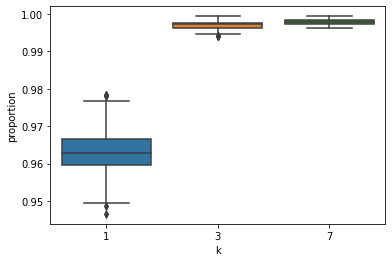

In [16]:
tsunicity.tsunicity.unicity_boxplot_multiple_k([unicity_all_1, unicity_all_3, unicity_all_7])

# Evolution of the global unicity depending of k and rounding (Q2)

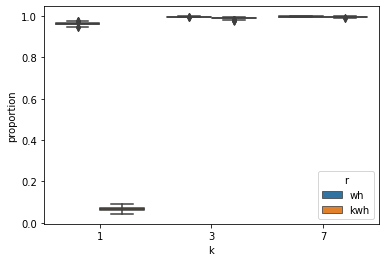

In [17]:
dfs = []

for unicity in [unicity_all_1, unicity_all_3, unicity_all_7]:
    df = unicity.df.copy()
    df["k"] = unicity.k
    df["r"] = "wh"
    dfs.append(df)

for unicity in [unicity_all_kwh_1, unicity_all_kwh_3, unicity_all_kwh_7]:
    df = unicity.df.copy()
    df["k"] = unicity.k
    df["r"] = "kwh"
    dfs.append(df)

df_k = pd.concat(dfs)

ax = sns.boxplot(data=df_k, x="k", y="proportion", hue="r")

# What instant is more at risk ? (Q3)

Unicity rate depending of k and the temporal grouping (by weekday, by day hours, month)

## By month (wh)

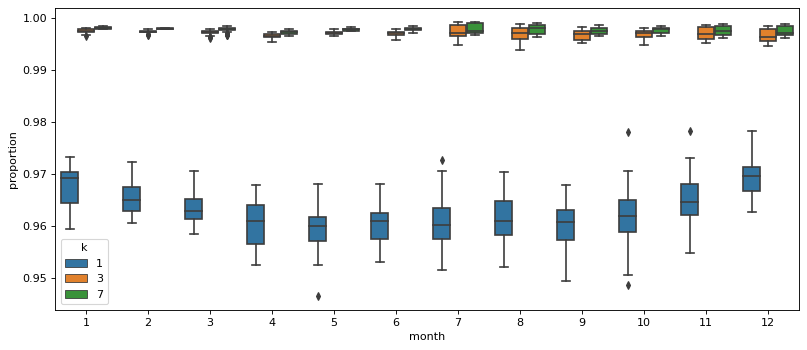

In [18]:
dfs = []

for unicity in [unicity_all_1, unicity_all_3, unicity_all_7]:
    df = unicity.df.copy()
    df["k"] = unicity.k
    dfs.append(df)

df_k = pd.concat(dfs)
df_k["month"] = df_k.timestamp.apply(lambda x: x.month)

plt.figure(figsize=(12, 5), dpi=80)
ax = sns.boxplot(data=df_k, x="month", y="proportion", hue="k")

## By month (kwh)

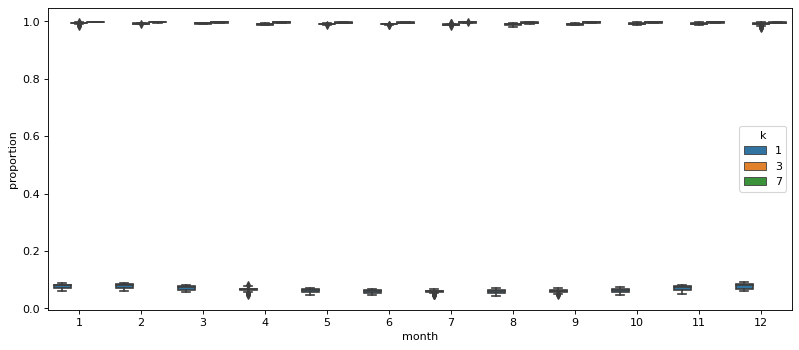

In [19]:
dfs = []

for unicity in [unicity_all_kwh_1, unicity_all_kwh_3, unicity_all_kwh_7]:
    df = unicity.df.copy()
    df["k"] = unicity.k
    dfs.append(df)

df_k = pd.concat(dfs)
df_k["month"] = df_k.timestamp.apply(lambda x: x.month)

plt.figure(figsize=(12, 5), dpi=80)
ax = sns.boxplot(data=df_k, x="month", y="proportion", hue="k")

## By weekday (wh)

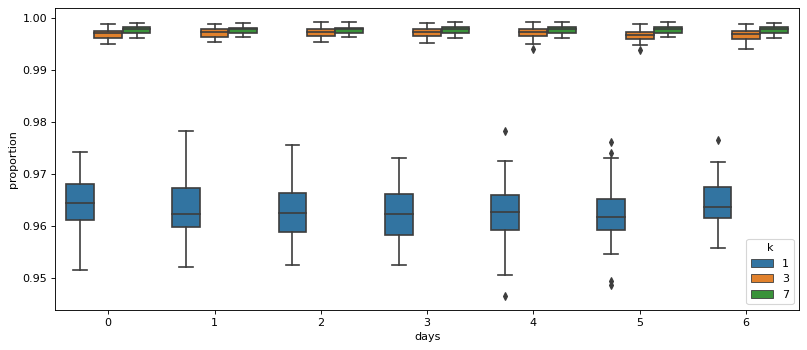

In [20]:
dfs = []

for unicity in [unicity_all_1, unicity_all_3, unicity_all_7]:
    df = unicity.df.copy()
    #groupby(unicity.df.timestamp.dt.weekday).mean()
    df["days"] = unicity.df.timestamp.dt.weekday
    
    #df["days"] = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    df["k"] = unicity.k
    dfs.append(df)

df_k = pd.concat(dfs)

plt.figure(figsize=(12, 5), dpi=80)
ax = sns.boxplot(data=df_k, x="days", y="proportion", hue="k")

## Weekday (kwh)

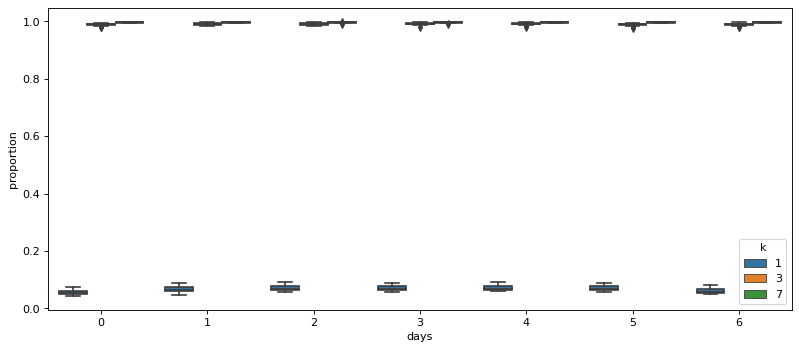

In [21]:
dfs = []

for unicity in [unicity_all_kwh_1, unicity_all_kwh_3, unicity_all_kwh_7]:
    df = unicity.df.copy()
    #groupby(unicity.df.timestamp.dt.weekday).mean()
    df["days"] = unicity.df.timestamp.dt.weekday
    
    #df["days"] = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    df["k"] = unicity.k
    dfs.append(df)

df_k = pd.concat(dfs)
df_k

plt.figure(figsize=(12, 5), dpi=80)
ax = sns.boxplot(data=df_k, x="days", y="proportion", hue="k")

## By hour of day (wh)

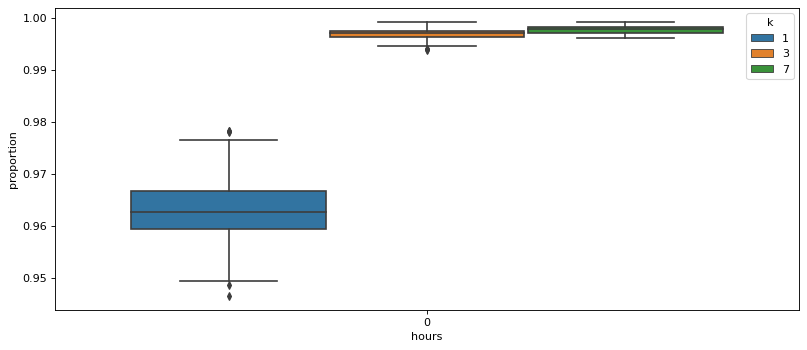

In [22]:
dfs = []

for unicity in [unicity_all_1, unicity_all_3, unicity_all_7]:
    df = unicity.df.copy()
    df["hours"] = unicity.df.timestamp.dt.hour
    df["k"] = unicity.k
    dfs.append(df)

df_k = pd.concat(dfs)

plt.figure(figsize=(12, 5), dpi=80)
ax = sns.boxplot(data=df_k, x="hours", y="proportion", hue="k")

## By hours of day (kwh)

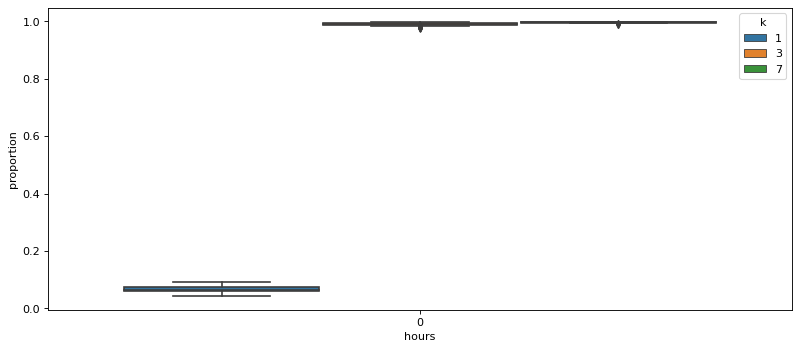

In [23]:
dfs = []

for unicity in [unicity_all_kwh_1, unicity_all_kwh_3, unicity_all_kwh_7]:
    df = unicity.df.copy()
    df["hours"] = unicity.df.timestamp.dt.hour
    df["k"] = unicity.k
    dfs.append(df)

df_k = pd.concat(dfs)

plt.figure(figsize=(12, 5), dpi=80)
ax = sns.boxplot(data=df_k, x="hours", y="proportion", hue="k")